In [ ]:
#Collab bootstrapping for accessing files from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Get the pickles
downloaded = drive.CreateFile({'id':"1aEoZt-nUQjvBum2342wuTBTdnxT98a2r"})
downloaded.GetContentFile('data_batch_1')

downloaded = drive.CreateFile({'id':"181kNZYyLqWNuYgX-d50Avf27GWoTbZZi"})
downloaded.GetContentFile('test_batch_trim')

In [ ]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_prefix = '/content/drive/My Drive/CE4042/Assignment2/PartA'

# Create folder to store models and results
if not os.path.exists(drive_prefix+'/models'):
    os.mkdir(drive_prefix+'/models')
if not os.path.exists(drive_prefix+'/results'):
    os.mkdir(drive_prefix+'/results')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fixed, no need change
def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  # python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32) / 255
    labels = np.array(labels, dtype=np.int32)
    return data, labels

In [ ]:
def make_model(num_ch_c1, num_ch_c2, use_dropout):
    ''' Note: This model is incomplete. You need to add suitable layers.
    '''

    model = tf.keras.Sequential()
    #First conv and maxpool
    model.add(layers.Conv2D(num_ch_c1, 9, padding='VALID', activation='relu', name="c1",input_shape=(32,32,3)))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=2,padding="VALID", name="s1"))
    #Second conv and maxpool
    model.add(layers.Conv2D(num_ch_c2, 5,padding='VALID',activation='relu',name="c2"))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=2,padding='VALID',name="s2"))
    #Moving on to FCs
    model.add(layers.Flatten())
    model.add(layers.Dense(300,activation=None))
    model.add(layers.Dense(10, use_bias=True))  # Here no softmax because we have combined it with the loss
    return model


In [ ]:
#Variables, constants and hyper parameters definition
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

num_ch_c1 = 50  # Question 2
num_ch_c2 = 60  # Question 2

epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001
optimizer_ = 'SGD'  # Question 3
use_dropout = False  # Question 3(d) (see make_model)
get_feature_map = True #Decide if to generate feature map
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

if optimizer_ == 'SGD':
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
elif optimizer_ == 'SGD-momentum':  # Question 3(a)
    raise NotImplementedError('Complete it by yourself')
elif optimizer_ == 'RMSProp':  # Question 3(b)
    raise NotImplementedError('Complete it by yourself')
elif optimizer_ == 'Adam':  # Question 3(c)
    raise NotImplementedError('Complete it by yourself')
else:
    raise NotImplementedError(f'You do not need to handle [{optimizer_}] in this project.')

In [ ]:
# Training and test
x_train, y_train = load_data('data_batch_1')
x_test, y_test = load_data('test_batch_trim')

#Reshape and transpose image
x_train = x_train.reshape(10000, 3, 32, 32).transpose(0,2,3,1)
x_test = x_test.reshape(2000, 3, 32, 32).transpose(0,2,3,1)

In [ ]:
#Build model
model = make_model(num_ch_c1, num_ch_c2, use_dropout)
model.summary()
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 24, 24, 50)        12200     
_________________________________________________________________
s1 (MaxPooling2D)            (None, 12, 12, 50)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 8, 8, 60)          75060     
_________________________________________________________________
s2 (MaxPooling2D)            (None, 4, 4, 60)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               288300    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
#Training
history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test))

Epoch 1/1000
79/79 [==============================] - 0s 6ms/step - loss: 2.3054 - accuracy: 0.1013 - val_loss: 2.2982 - val_accuracy: 0.1125
Epoch 2/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2938 - accuracy: 0.1188 - val_loss: 2.2904 - val_accuracy: 0.1140
Epoch 3/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2873 - accuracy: 0.1195 - val_loss: 2.2844 - val_accuracy: 0.1170
Epoch 4/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2812 - accuracy: 0.1259 - val_loss: 2.2779 - val_accuracy: 0.1355
Epoch 5/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2743 - accuracy: 0.1383 - val_loss: 2.2701 - val_accuracy: 0.1465
Epoch 6/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2660 - accuracy: 0.1515 - val_loss: 2.2615 - val_accuracy: 0.1665
Epoch 7/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2570 - accuracy: 0.1639 - val_loss: 2.2521 - val_accuracy: 0.1825
Epoch 

In [ ]:
#Checking the shape of images
#Image is of size 32x32x3 so definitely need rehaping
x_test.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


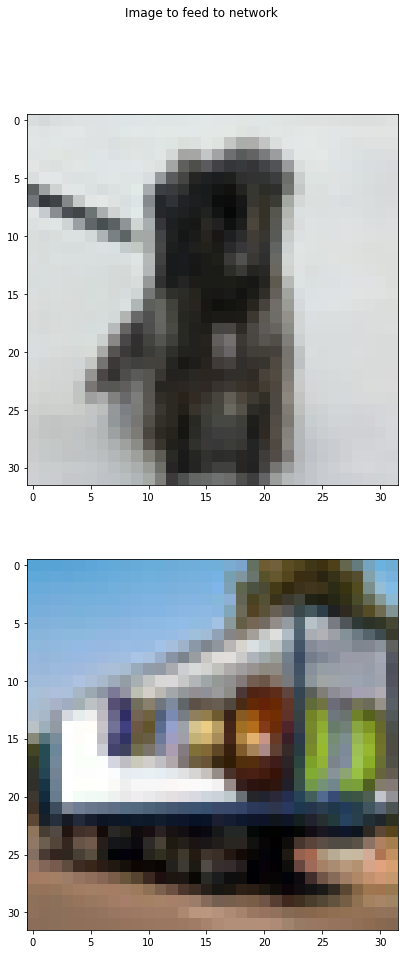

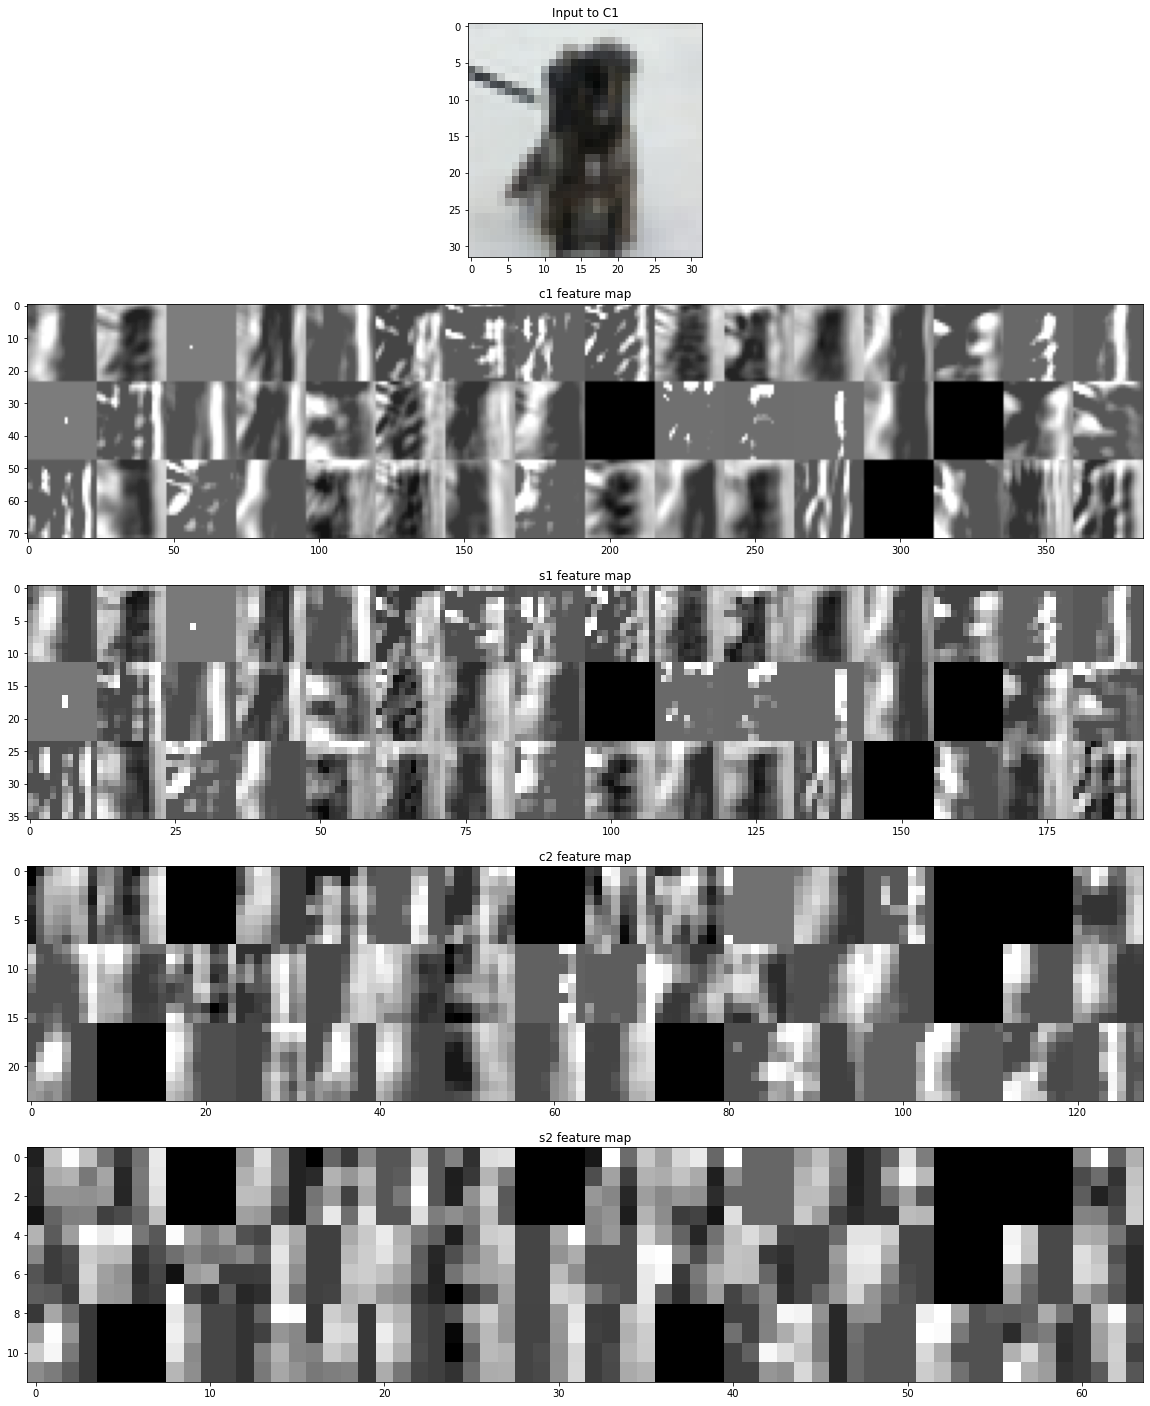

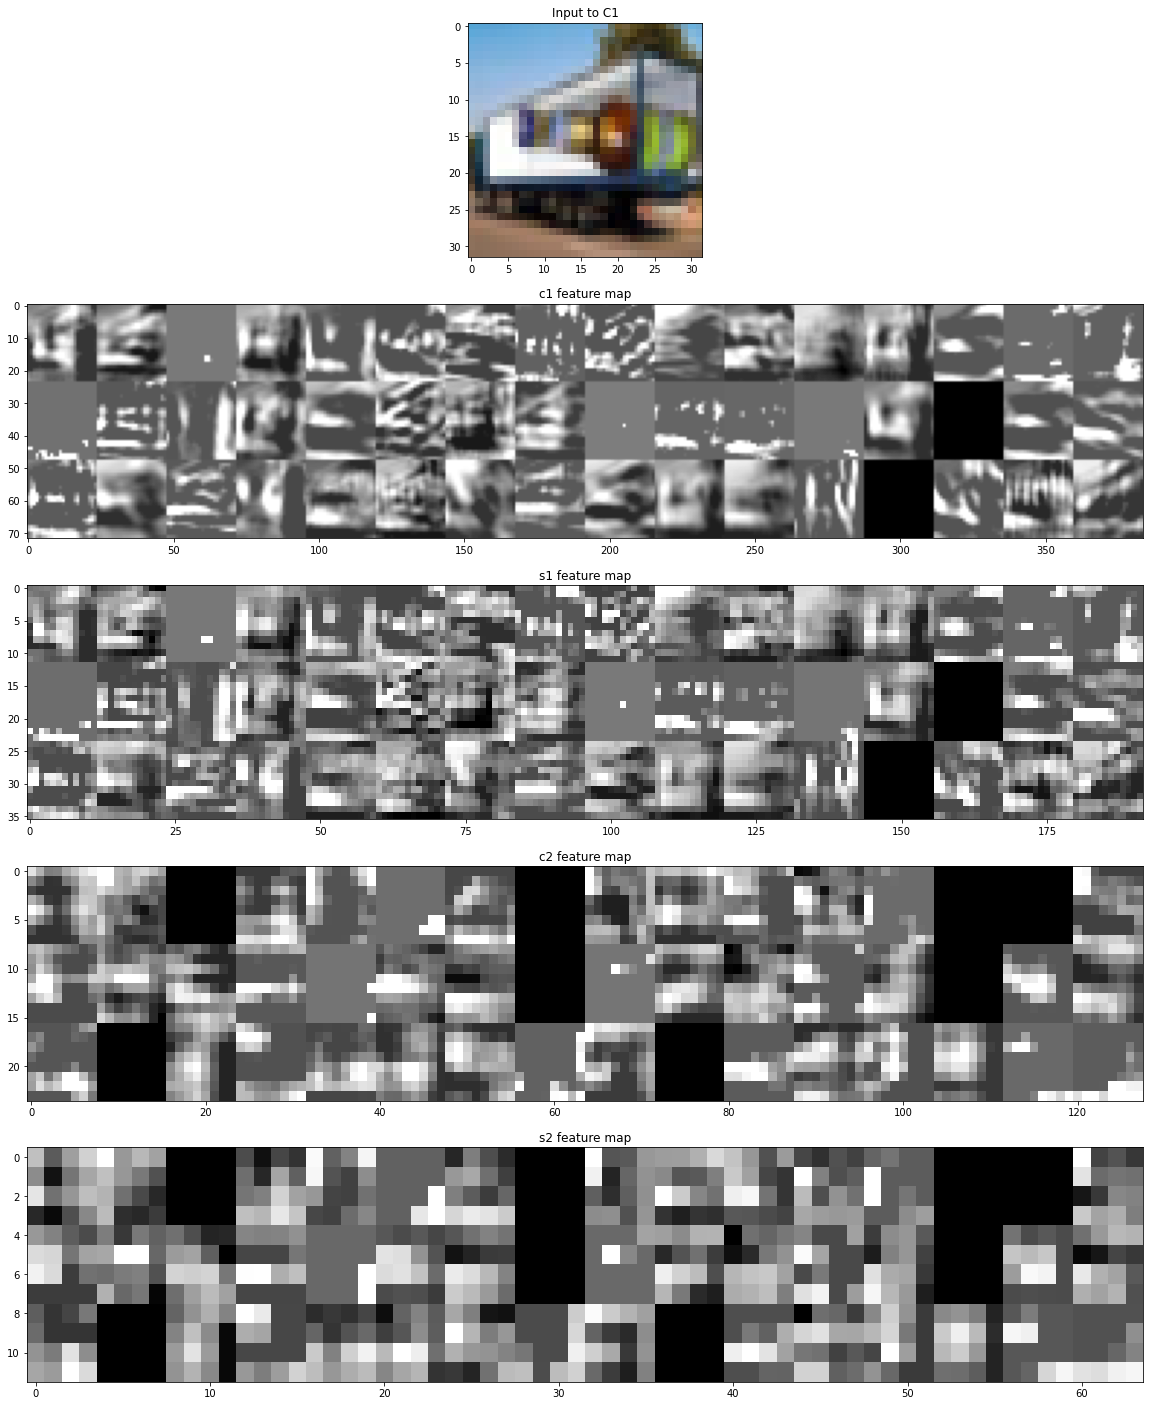

In [ ]:
#Get the original images from flatten data, select first 2 images only
if (get_feature_map is True):
  # x_test_recovered = x_test.reshape(2000, 3, 32, 32).transpose(0,2,3,1)
  # x_test_recovered = x_test_recovered[0:2]
  x_test_recovered = x_test[0:2]

  #Plot the 2 recovered images
  plt.figure(figsize=(12,15))
  plt.suptitle("Image to feed to network")
  plt.subplot(211)
  plt.imshow(x_test_recovered[0])
  plt.subplot(212)
  plt.imshow(x_test_recovered[1])

  #The layers we wish to examine their intermediate output reshape, conv1, maxpool1
  #conv2, maxpool2
  layer_outputs = [layer.output for layer in model.layers[:4]]

  #Create the activation model to extract
  activation_model = keras.models.Model(inputs = model.input,outputs = layer_outputs)

  # Names of the layers, so you can have them as part of your plot
  layer_names = []
  for layer in model.layers[:4]:
      layer_names.append(layer.name) 
      
  images_per_row = 16
  image_idx = 0

  for image in x_test_recovered:
      figure, axes = plt.subplots(5, figsize=(20,25))
      subplot_idx = 1

      #Obtain the output arrays for this image
      activations = activation_model.predict(np.array([image]))

      #Display the output of the 5 layers: reshape (image), conv1, maxpool1, conv2,
      #maxpool2 (feature maps)
      axes[0].set_title("Input to C1")
      axes[0].imshow(image)

      for layer_name, layer_activation in zip(layer_names, activations):
        # Number of features in the feature map
        n_features = layer_activation.shape[-1]

        #The feature map has shape (1, size, size, n_features).
        size = layer_activation.shape[1]

        # Tiles the activation channels in this matrix 
        n_cols = n_features // images_per_row 
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # Tiles each filter into a big horizontal grid
        for col in range(n_cols): 
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]

                # Post-processes the feature to make it visually palatable
                channel_image -= channel_image.mean() 
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')

                # Displays the grid
                display_grid[col * size : (col + 1) * size, 
                            row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        axes[subplot_idx].set_title(layer_name + " feature map")
        axes[subplot_idx].grid(False)
        axes[subplot_idx].imshow(display_grid, aspect='auto', cmap='gray')
        subplot_idx += 1

      figure.savefig(
          f'{drive_prefix}/results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_ft_map_{image_idx}.png'
      )
      image_idx +=1



In [ ]:
#Passing through reshape, conv1, maxpool1, conv2 and maxpool2
for layer_activation in activations:
  print(layer_activation.shape)

(1, 24, 24, 50)
(1, 12, 12, 50)
(1, 8, 8, 60)
(1, 4, 4, 60)


In [ ]:
# Save model
if use_dropout:
    model.save(f'{drive_prefix}/models/{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout')
else:
    model.save(f'{drive_prefix}/models/{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout')

INFO:tensorflow:Assets written to: /content/drive/My Drive/CE4042/Assignment2/PartA/models/50_60_SGD_no_dropout/assets


In [ ]:
#Search for best test accuracy
best_test_acc = np.max(history.history['val_accuracy'])
print(best_test_acc)

0.5889999866485596


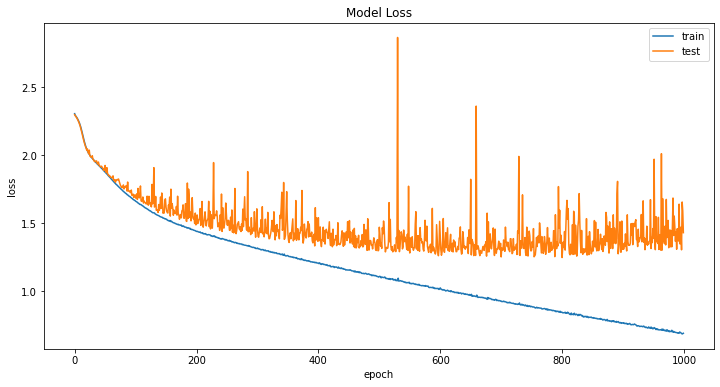

In [ ]:
# Save the plot for losses
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper right' )
if use_dropout:
    plt.savefig(
        f'{drive_prefix}/results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout_loss.png')
else:
    plt.savefig(
        f'{drive_prefix}/results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout_loss.png'
    )

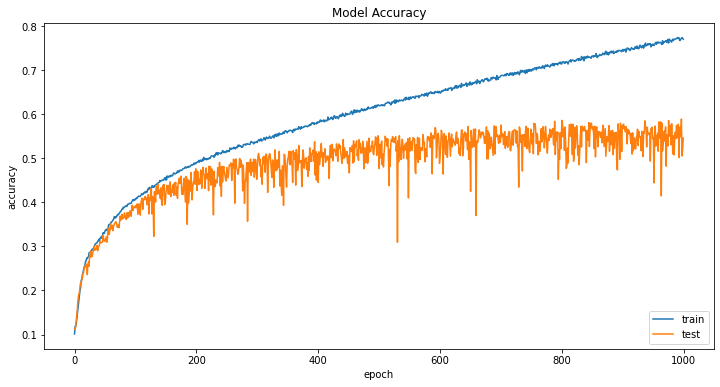

In [ ]:
# Save the plot for accuracies
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'lower right' )
if use_dropout:
    plt.savefig(
        f'{drive_prefix}/results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout_accuracy.png'
    )
else:
    plt.savefig(
        f'{drive_prefix}/results/{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout_accuracy.png'
    )